1\. **PCA on 3D dataset**

* Generate a dataset simulating 3 features, each with N entries (N being ${\cal O}(1000)$). Each feature is made by random numbers generated according the normal distribution $N(\mu,\sigma)$ with mean $\mu_i$ and standard deviation $\sigma_i$, with $i=1, 2, 3$. Generate the 3 variables $x_{i}$ such that:
    * $x_1$ is distributed as $N(0,1)$
    * $x_2$ is distributed as $x_1+N(0,3)$
    * $x_3$ is given by $2x_1+x_2$
* Find the eigenvectors and eigenvalues using the eigendecomposition of the covariance matrix
* Find the eigenvectors and eigenvalues using the SVD. Check that the two procedures yield to same result
* What percent of the total dataset's variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained
* Redefine the data according to the new basis from the PCA
* Plot the data, in both the original and the new basis. The figure should have 2 rows (the original and the new basis) and 3 columns (the $[x_0, x_1]$, $[x_0, x_2]$ and $[x_1, x_2]$ projections) of scatter plots.

In [1]:
import numpy as np
from scipy import linalg as la
from matplotlib import pyplot as plt

In [2]:
x1 = np.random.normal(0, 1, 1000)
x2 = x1 + np.random.normal(0, 3, 1000)
x3 = 2*x1 + x2

In [3]:
X = np.array([x1, x2, x3])
print('Matrix:\n', X, '\n')

C = np.cov(X)
print('Covariance matrix:\n', C, '\n')

l, V = la.eig(C)

i = l.argsort()[::-1]
l = l[i]
V = V[:,i]
print('Eigenvalues:\n', l, '\n')
print('Real Eigenvalues:\n', np.real_if_close(l), '\n')
print('Eigenvectors:\n', V, '\n')

Matrix:
 [[ 0.03784284  1.28577532  1.7001095  ... -0.24785965  0.71827275
   0.40096883]
 [-0.65805144 -1.7693164  -1.70658385 ...  0.06230925  2.39434567
  -0.19861052]
 [-0.58236575  0.80223425  1.69363515 ... -0.43341006  3.83089117
   0.60332713]] 

Covariance matrix:
 [[ 1.00778157  1.1357227   3.15128585]
 [ 1.1357227  10.12657079 12.3980162 ]
 [ 3.15128585 12.3980162  18.70058789]] 

Eigenvalues:
 [ 2.79189271e+01+0.j  1.91601318e+00+0.j -2.85638727e-16+0.j] 

Real Eigenvalues:
 [ 2.79189271e+01  1.91601318e+00 -2.85638727e-16] 

Eigenvectors:
 [[-0.11914263  0.56492333 -0.81649658]
 [-0.57274431 -0.71084266 -0.40824829]
 [-0.81102958  0.419004    0.40824829]] 



In [4]:
U, s, Vt = la.svd(C)

print("Spectrum:\n", s, '\n')
print("U:\n", U, '\n')
print("V^T:\n", Vt, '\n')

Spectrum:
 [2.79189271e+01 1.91601318e+00 1.01911184e-15] 

U:
 [[-0.11914263  0.56492333 -0.81649658]
 [-0.57274431 -0.71084266 -0.40824829]
 [-0.81102958  0.419004    0.40824829]] 

V^T:
 [[-0.11914263 -0.57274431 -0.81102958]
 [ 0.56492333 -0.71084266  0.419004  ]
 [ 0.81649658  0.40824829 -0.40824829]] 



In [5]:
S = np.zeros((3, 3))
for i in range(min(3, 3)):
    S[i, i] = s[i]
print("S:\n", S, '\n')

SVD = np.dot(U, np.dot(S, Vt))
print("SVD:\n", SVD, '\n')
print("Are the SVD and A matrices equal?", np.allclose(SVD, C))

S:
 [[2.79189271e+01 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 1.91601318e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 1.01911184e-15]] 

SVD:
 [[ 1.00778157  1.1357227   3.15128585]
 [ 1.1357227  10.12657079 12.3980162 ]
 [ 3.15128585 12.3980162  18.70058789]] 

Are the SVD and A matrices equal? True


In [6]:
Lambda = np.diag(l)
print("Lambda:\n", Lambda, '\n')
print("Trace(C):\n", C.trace(), '\n')
print("Trace(Lambda):\n", Lambda.trace(), '\n')

# ratio between sum of eigenvalues selected and trace of eigenvalues matrix, 
# gives the retain % of the total variability

print("By selecting the components 0 and 2, we retain %.8f%% of the total variability" % ((np.real_if_close(np.sum(l[:2]))/np.real_if_close(Lambda.trace())*100)))


Lambda:
 [[ 2.79189271e+01+0.j  0.00000000e+00+0.j  0.00000000e+00+0.j]
 [ 0.00000000e+00+0.j  1.91601318e+00+0.j  0.00000000e+00+0.j]
 [ 0.00000000e+00+0.j  0.00000000e+00+0.j -2.85638727e-16+0.j]] 

Trace(C):
 29.834940249068485 

Trace(Lambda):
 (29.8349402490685+0j) 

By selecting the components 0 and 2, we retain 100.00000000% of the total variability


In [7]:
V_pca = V[:,:2]
Xp = np.dot(V_pca.T, X)
Xp = np.vstack([Xp, np.zeros((1, 1000))]) 
print('Rotate data points:\n', Xp, '\n')

Rotate data points:
 [[ 0.84470238  0.20953954 -0.59870754 ...  0.34535176 -4.56389084
  -0.42333559]
 [ 0.24513576  2.3202094   2.88318401 ... -0.36591432  0.30892471
   0.62049396]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]] 



Text(940.764705882353, 0.5, '$x3$')

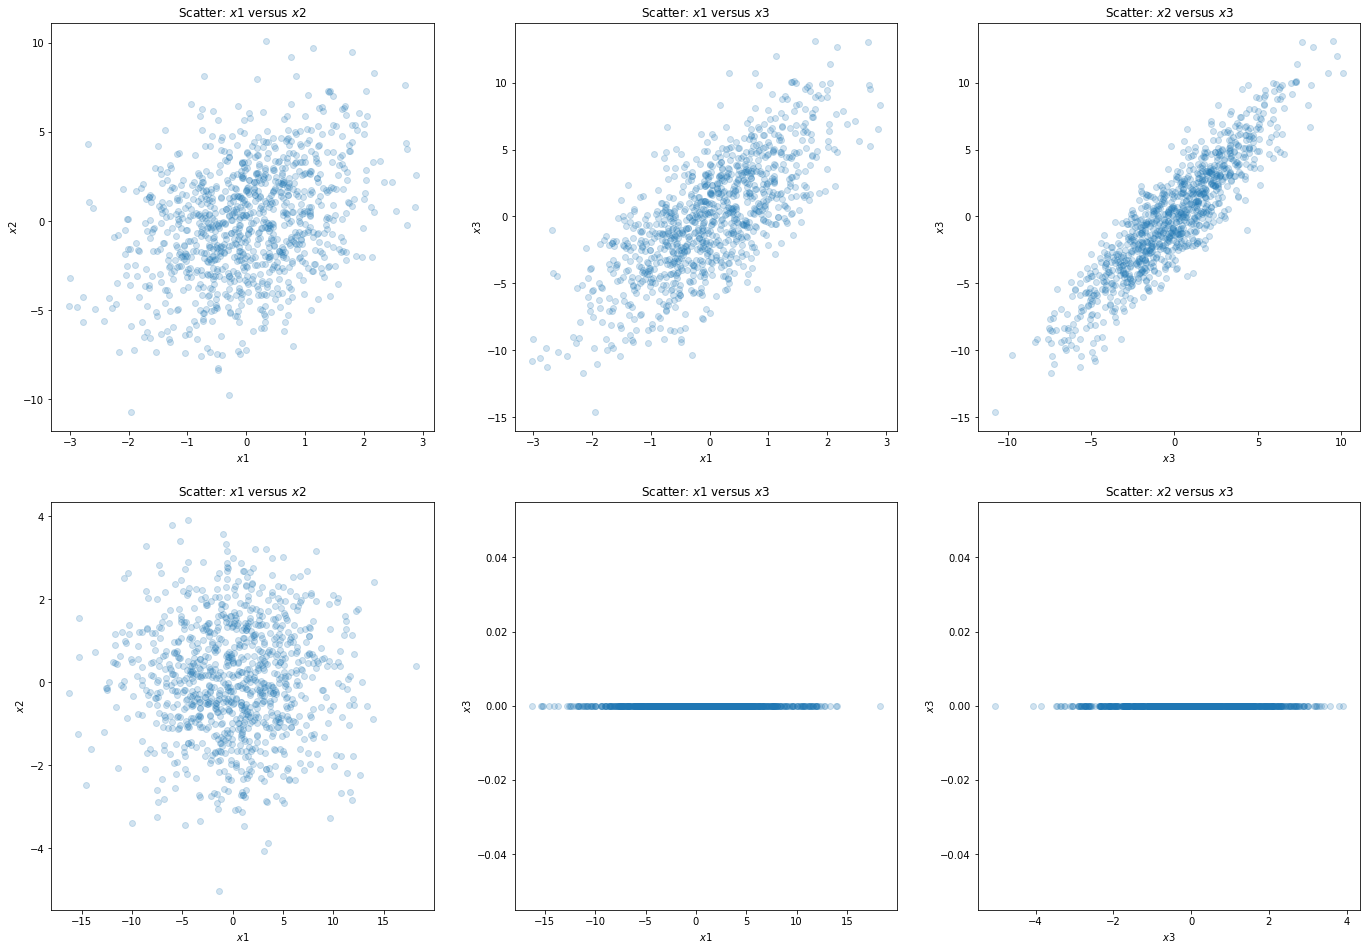

In [8]:
import matplotlib.pyplot as plt

fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows=2, ncols=3, figsize=(20,14))
fig.tight_layout(pad=5.0)

ax1.scatter(X[0,:], X[1,:], alpha=0.2)
ax1.set_title('Scatter: $x1$ versus $x2$')
ax1.set_xlabel('$x1$')
ax1.set_ylabel('$x2$')

ax2.scatter(X[0,:], X[2,:], alpha=0.2)
ax2.set_title('Scatter: $x1$ versus $x3$')
ax2.set_xlabel('$x1$')
ax2.set_ylabel('$x3$')

ax3.scatter(X[1,:], X[2,:], alpha=0.2)
ax3.set_title('Scatter: $x2$ versus $x3$')
ax3.set_xlabel('$x3$')
ax3.set_ylabel('$x3$')

ax4.scatter(Xp[0,:], Xp[1,:], alpha=0.2)
ax4.set_title('Scatter: $x1$ versus $x2$')
ax4.set_xlabel('$x1$')
ax4.set_ylabel('$x2$')

ax5.scatter(Xp[0,:], Xp[2,:], alpha=0.2)
ax5.set_title('Scatter: $x1$ versus $x3$')
ax5.set_xlabel('$x1$')
ax5.set_ylabel('$x3$')

ax6.scatter(Xp[1,:], Xp[2,:], alpha=0.2)
ax6.set_title('Scatter: $x2$ versus $x3$')
ax6.set_xlabel('$x3$')
ax6.set_ylabel('$x3$')

# 2\. **PCA on a nD dataset**

* Start from the dataset you have genereted in the previous exercise and add uncorrelated random noise. Such noise should be represented by other 10 uncorrelated variables normally distributed, with a standard deviation much smaller (e.g. a factor 20) than those used to generate the $x_1$ and $x_2$. Repeat the PCA procedure and compare the results with what you have obtained before.

In [9]:
n1 = np.random.normal(0, 1/20, 1000)
n2 = np.random.normal(0, 1/30, 1000)
n3 = np.random.normal(0, 1/40, 1000)
n4 = np.random.normal(0, 1/50, 1000)
n5 = np.random.normal(0, 1/60, 1000)
n6 = np.random.normal(0, 1/70, 1000)
n7 = np.random.normal(0, 1/80, 1000)
n8 = np.random.normal(0, 1/90, 1000)
n9 = np.random.normal(0, 1/100, 1000)
n10 = np.random.normal(0, 1/110, 1000)

In [10]:
X_n = np.array([x1, x2, x3, n1, n2, n3, n4, n5, n6, n7, n8, n9, n10])
print('Matrix:\n', X_n, '\n')

C_n = np.cov(X_n)
print('Covariance matrix:\n', C_n, '\n')

l_n, V_n = la.eig(C_n)

i = l_n.argsort()[::-1]
l_n = l_n[i]
V_n = V_n[:,i]
print('Eigenvalues:\n', l_n, '\n')
print('Real Eigenvalues:\n', np.real_if_close(l_n), '\n')
print('Eigenvectors:\n', V_n, '\n')

Matrix:
 [[ 3.78428414e-02  1.28577532e+00  1.70010950e+00 ... -2.47859654e-01
   7.18272752e-01  4.00968828e-01]
 [-6.58051437e-01 -1.76931640e+00 -1.70658385e+00 ...  6.23092493e-02
   2.39434567e+00 -1.98610522e-01]
 [-5.82365754e-01  8.02234247e-01  1.69363515e+00 ... -4.33410059e-01
   3.83089117e+00  6.03327134e-01]
 ...
 [-4.50097131e-04 -9.33272134e-03 -8.57550046e-03 ... -1.10041762e-02
  -1.09963442e-02  7.37442064e-04]
 [-2.00335295e-03 -2.65493179e-03 -1.85884411e-02 ...  6.69473500e-03
  -1.24196386e-02 -5.79536211e-03]
 [ 1.35138324e-02 -3.35045243e-03  4.85585866e-03 ... -5.03061946e-03
   5.14681138e-03  8.12127397e-03]] 

Covariance matrix:
 [[ 1.00778157e+00  1.13572270e+00  3.15128585e+00 -2.47303133e-03
  -1.03915878e-04  6.81159951e-05 -1.12154162e-03 -4.63935878e-05
  -7.48948169e-04 -2.54788901e-04  3.05034872e-04  4.40778743e-05
   4.11331123e-04]
 [ 1.13572270e+00  1.01265708e+01  1.23980162e+01 -5.73117782e-03
  -2.44257396e-04  3.33246275e-03 -5.02297411e-03 

In [11]:
Lambda_n = np.diag(l_n)
print("Lambda:\n", Lambda_n, '\n')
print("Trace(C):\n", C_n.trace(), '\n')
print("Trace(Lambda):\n", Lambda_n.trace(), '\n')

# ratio between sum of eigenvalues selected and trace of eigenvalues matrix, 
# gives the retain % of the total variability

print("By selecting the component 0, we retain %.8f%% of the total variability" % (np.real_if_close(Lambda_n[0,0])/np.real_if_close(Lambda_n.trace())*100))

Lambda:
 [[ 2.79189374e+01+0.j  0.00000000e+00+0.j  0.00000000e+00+0.j
   0.00000000e+00+0.j  0.00000000e+00+0.j  0.00000000e+00+0.j
   0.00000000e+00+0.j  0.00000000e+00+0.j  0.00000000e+00+0.j
   0.00000000e+00+0.j  0.00000000e+00+0.j  0.00000000e+00+0.j
   0.00000000e+00+0.j]
 [ 0.00000000e+00+0.j  1.91601585e+00+0.j  0.00000000e+00+0.j
   0.00000000e+00+0.j  0.00000000e+00+0.j  0.00000000e+00+0.j
   0.00000000e+00+0.j  0.00000000e+00+0.j  0.00000000e+00+0.j
   0.00000000e+00+0.j  0.00000000e+00+0.j  0.00000000e+00+0.j
   0.00000000e+00+0.j]
 [ 0.00000000e+00+0.j  0.00000000e+00+0.j  2.46617445e-03+0.j
   0.00000000e+00+0.j  0.00000000e+00+0.j  0.00000000e+00+0.j
   0.00000000e+00+0.j  0.00000000e+00+0.j  0.00000000e+00+0.j
   0.00000000e+00+0.j  0.00000000e+00+0.j  0.00000000e+00+0.j
   0.00000000e+00+0.j]
 [ 0.00000000e+00+0.j  0.00000000e+00+0.j  0.00000000e+00+0.j
   1.10924648e-03+0.j  0.00000000e+00+0.j  0.00000000e+00+0.j
   0.00000000e+00+0.j  0.00000000e+00+0.j  0.00000000e

In [12]:
Xp_n = np.dot(V_n.T, X_n)
print('Rotate data points:\n', Xp_n, '\n')

Rotate data points:
 [[-8.44723943e-01 -2.09521362e-01  5.98702715e-01 ... -3.45363155e-01
   4.56389828e+00  4.23322140e-01]
 [-2.45103723e-01 -2.32023675e+00 -2.88315837e+00 ...  3.65947883e-01
  -3.08934480e-01 -6.20491701e-01]
 [-5.58029908e-02  3.75397659e-02 -1.63555468e-02 ... -2.67776727e-02
   1.94641146e-02 -5.30597099e-03]
 ...
 [-5.19324789e-04 -2.68453207e-03 -1.29927501e-02 ...  6.39630824e-03
  -8.76216639e-03 -3.14172200e-03]
 [ 1.26835414e-02 -4.14128783e-03  7.15025754e-03 ... -5.92116399e-03
   6.83234153e-03  9.61398067e-03]
 [ 1.25105688e-16  4.04836222e-15  4.81025563e-15 ... -5.95657678e-16
   1.25306455e-15  9.71368844e-16]] 



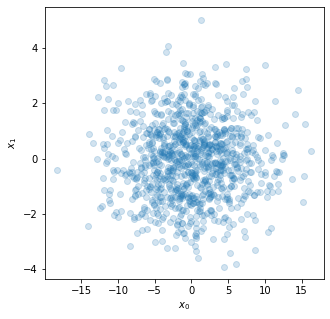

In [13]:
plt.figure(figsize=(5,5))
plt.xlabel("$x_0$")
plt.ylabel("$x_1$")
plt.scatter(Xp_n[0,:], Xp_n[1,:], alpha=0.2)

3\. **Optional**: **PCA on the MAGIC dataset**

Perform a PCA on the magic04.data dataset.

In [14]:
# get the dataset and its description on the proper data directory
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data -P data/
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names -P data/ 

In [15]:
import csv
import pandas as pd

data_file = './data/magic04.data'

dataset = pd.read_csv(data_file, header=None)
dataset.pop(dataset.columns[-1])
dataset = dataset.T
print(dataset)

     0         1         2         3         4         5         6      \
0  28.7967   31.6036  162.0520   23.8172   75.1362   51.6240   48.2468   
1  16.0021   11.7235  136.0310    9.5728   30.9205   21.1502   17.3565   
2   2.6449    2.5185    4.0612    2.3385    3.1611    2.9085    3.0332   
3   0.3918    0.5303    0.0374    0.6147    0.3168    0.2420    0.2529   
4   0.1982    0.3773    0.0187    0.3922    0.1832    0.1340    0.1515   
5  27.7004   26.2722  116.7410   27.2107   -5.5277   50.8761    8.5730   
6  22.0110   23.8238  -64.8580   -6.4633   28.5525   43.1887   38.0957   
7  -8.2027   -9.9574  -45.2160   -7.1513   21.8393    9.8145   10.5868   
8  40.0920    6.3609   76.9600   10.4490    4.6480    3.6130    4.7920   
9  81.8828  205.2610  256.7880  116.7370  356.4620  238.0980  219.0870   

      7         8         9      ...     19010     19011     19012     19013  \
0   26.7897   96.2327   46.7619  ...   32.4902   79.5528   31.8373  182.5003   
1   13.7595   46.5165   1

In [16]:
C = np.cov(dataset)
print('Covariance matrix:\n', C, '\n')

Covariance matrix:
 [[ 1.79478093e+03  5.98863542e+02  1.40642293e+01 -4.88699477e+00
  -2.80038030e+00 -9.24434103e+02 -2.58727155e+02  1.18140078e+01
  -9.70681761e+00  1.32486413e+03]
 [ 5.98863542e+02  3.36577782e+02  6.22110176e+00 -2.04513685e+00
  -1.17822641e+00 -2.89972346e+02 -1.64893734e+02  1.51860869e+01
   3.16366938e+01  4.61786200e+02]
 [ 1.40642293e+01  6.22110176e+00  2.23349483e-01 -7.35110795e-02
  -4.22432318e-02 -4.47307815e+00  2.29353454e+00  1.52121337e-01
  -2.30292484e+00  1.54354673e+01]
 [-4.88699477e+00 -2.04513685e+00 -7.35110795e-02  3.34206468e-02
   1.97262797e-02  1.21519489e+00 -1.13652751e+00 -4.30025009e-02
   1.12273751e+00 -4.48566053e+00]
 [-2.80038030e+00 -1.17822641e+00 -4.22432318e-02  1.97262797e-02
   1.22126367e-02  6.55332684e-01 -6.69389146e-01 -2.52390547e-02
   6.62907179e-01 -2.51579453e+00]
 [-9.24434103e+02 -2.89972346e+02 -4.47307815e+00  1.21519489e+00
   6.55332684e-01  3.50535778e+03  8.27482747e+02  3.14793086e+00
  -8.60663498

In [17]:
l, V = la.eig(C)

i = l.argsort()[::-1]
l = l[i]
V = V[:,i]

print('Eigenvalues:\n', l, '\n')
print('Real Eigenvalues:\n', np.real_if_close(l), '\n')
print('Eigenvectors:\n', V, '\n')

Eigenvalues:
 [6.57979140e+03+0.j 3.85387048e+03+0.j 2.01638313e+03+0.j
 1.32675968e+03+0.j 6.10187259e+02+0.j 4.33599171e+02+0.j
 1.17330074e+02+0.j 8.63965822e-02+0.j 1.07363851e-02+0.j
 3.85322859e-04+0.j] 

Real Eigenvalues:
 [6.57979140e+03 3.85387048e+03 2.01638313e+03 1.32675968e+03
 6.10187259e+02 4.33599171e+02 1.17330074e+02 8.63965822e-02
 1.07363851e-02 3.85322859e-04] 

Eigenvectors:
 [[-3.27812305e-01 -1.34406332e-01  6.55078481e-02  8.63988253e-01
   9.45511967e-02 -1.98552026e-02  3.38166662e-01  3.99907112e-03
  -4.54836725e-04  4.57080123e-05]
 [-1.13810001e-01 -5.38837224e-02 -1.89938175e-02  3.19766485e-01
  -1.97548493e-02  2.32592322e-02 -9.38307839e-01  1.33847863e-02
   6.74902809e-04 -5.73158421e-05]
 [-3.06076690e-03  6.59372017e-04  1.05931761e-03  6.93028658e-03
   2.65185255e-03  1.33441545e-04 -1.08823228e-02 -9.27765187e-01
  -3.72229862e-01  2.26331399e-02]
 [ 9.27109146e-04 -2.58205308e-04 -5.10399700e-04 -2.60555110e-03
  -1.53899865e-03 -3.46437681e-0

In [18]:
Lambda = np.diag(l)
print("Lambda:\n", Lambda, '\n')
print("Trace(Lambda):\n", Lambda.trace(), '\n')

Lambda:
 [[6.57979140e+03+0.j 0.00000000e+00+0.j 0.00000000e+00+0.j
  0.00000000e+00+0.j 0.00000000e+00+0.j 0.00000000e+00+0.j
  0.00000000e+00+0.j 0.00000000e+00+0.j 0.00000000e+00+0.j
  0.00000000e+00+0.j]
 [0.00000000e+00+0.j 3.85387048e+03+0.j 0.00000000e+00+0.j
  0.00000000e+00+0.j 0.00000000e+00+0.j 0.00000000e+00+0.j
  0.00000000e+00+0.j 0.00000000e+00+0.j 0.00000000e+00+0.j
  0.00000000e+00+0.j]
 [0.00000000e+00+0.j 0.00000000e+00+0.j 2.01638313e+03+0.j
  0.00000000e+00+0.j 0.00000000e+00+0.j 0.00000000e+00+0.j
  0.00000000e+00+0.j 0.00000000e+00+0.j 0.00000000e+00+0.j
  0.00000000e+00+0.j]
 [0.00000000e+00+0.j 0.00000000e+00+0.j 0.00000000e+00+0.j
  1.32675968e+03+0.j 0.00000000e+00+0.j 0.00000000e+00+0.j
  0.00000000e+00+0.j 0.00000000e+00+0.j 0.00000000e+00+0.j
  0.00000000e+00+0.j]
 [0.00000000e+00+0.j 0.00000000e+00+0.j 0.00000000e+00+0.j
  0.00000000e+00+0.j 6.10187259e+02+0.j 0.00000000e+00+0.j
  0.00000000e+00+0.j 0.00000000e+00+0.j 0.00000000e+00+0.j
  0.00000000e+00+0

In [19]:
print("By selecting the components 0, we retain %.8f%% of the total variability" % ((np.real_if_close(Lambda[0,0]))/np.real_if_close(Lambda.trace())*100))
print("By selecting the components 1, we retain %.8f%% of the total variability" % ((np.real_if_close(Lambda[1,1]))/np.real_if_close(Lambda.trace())*100))
print("By selecting the components 2, we retain %.8f%% of the total variability" % ((np.real_if_close(Lambda[2,2]))/np.real_if_close(Lambda.trace())*100))
print("By selecting the components 3, we retain %.8f%% of the total variability" % ((np.real_if_close(Lambda[3,3]))/np.real_if_close(Lambda.trace())*100))
print("By selecting the components 4, we retain %.8f%% of the total variability" % ((np.real_if_close(Lambda[4,4]))/np.real_if_close(Lambda.trace())*100))
print("By selecting the components 5, we retain %.8f%% of the total variability" % ((np.real_if_close(Lambda[5,5]))/np.real_if_close(Lambda.trace())*100))
print("By selecting the components 6, we retain %.8f%% of the total variability" % ((np.real_if_close(Lambda[6,6]))/np.real_if_close(Lambda.trace())*100))
print("By selecting the components 7, we retain %.8f%% of the total variability" % ((np.real_if_close(Lambda[7,7]))/np.real_if_close(Lambda.trace())*100))
print("By selecting the components 8, we retain %.8f%% of the total variability" % ((np.real_if_close(Lambda[8,8]))/np.real_if_close(Lambda.trace())*100))
print("By selecting the components 9, we retain %.8f%% of the total variability" % ((np.real_if_close(Lambda[9,9]))/np.real_if_close(Lambda.trace())*100))


By selecting the components 0, we retain 44.04728316% of the total variability
By selecting the components 1, we retain 25.79907387% of the total variability
By selecting the components 2, we retain 13.49833045% of the total variability
By selecting the components 3, we retain 8.88176474% of the total variability
By selecting the components 4, we retain 4.08479378% of the total variability
By selecting the components 5, we retain 2.90265516% of the total variability
By selecting the components 6, we retain 0.78544603% of the total variability
By selecting the components 7, we retain 0.00057837% of the total variability
By selecting the components 8, we retain 0.00007187% of the total variability
By selecting the components 9, we retain 0.00000258% of the total variability


In [20]:
print("By selecting the first 2 components, we retain %.8f%% of the total variability" % ((np.real_if_close(np.sum(l[:2]))/np.real_if_close(Lambda.trace())*100)))


By selecting the first 2 components, we retain 69.84635702% of the total variability


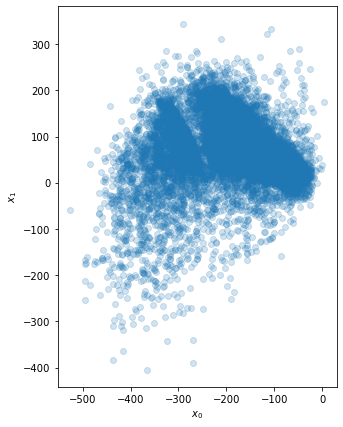

In [21]:
V_new = V[:,:2]
X = np.dot(V_new.T, dataset)

plt.figure(figsize=(5,7))
plt.xlabel("$x_0$")
plt.ylabel("$x_1$")
plt.scatter(X[0,:], X[1,:], alpha=0.2)